# Report - Effect of changing position of pitot tube in Test Section

##### Problem

Running a tunnel calibration requires a pitot tube to be fitted through the bottom panel of the test section. From that moment until the pitot tube is removed once the calibration finishes, there is risk of an operator inadvertendly loading a box of sensors which would cause the robot to load a sensor in the test section, crashing into the pitot tube and potentially damaging it. 

### Proposed solutions

In order to prevent this from happening, there are several solutions, some of which are listed below:
- 1) Lower the position of the pitot tube, currently centered in the test secion, so that it clears the area where a sensor is loaded by the robot.
- 2) Engineer some sort of interlock that prevents robot from loading any sensors, should a different stage other than the "test section bottom plug" be fitted.
- 3) Vision recognision system to verify that the test section is empty before letting the robot load sensors.

Out of the previous 3 options, the first one would be the simplest and quickest to implement, not requiring any software change on either the autoloading station or the wind tunnel control and calibration software.

### Lowering position of pitot tube

As part of the tunnel comissioning tests, the wind flow across the test section was qualified laminar and uniform with exception of a small band around its walls, hence it is fair to think that lowering the position of the pitot tube from position 1 by approximately 50mm to position 2 should not have much impact on tunnel performance. Besides the blockage effect caused by the pitot tube itself will be very small.

<img src=".\Test Section.png">

In order to verify this, two wind tunnel calibration profiles have been run in the tunnel. For the first of the runs the pitot tube was in position 1, changing it to position 2 for the second run. The tunnel runs from 0m/s to 85m/s in steps of 5m/s, staying at each speed for 5 seconds after the tunnel settles.

Let's process the results to see how much impact this relocation of the pitot has on the Fan speed in RPM, the wind flow measured by Manometer 1 (left), Manometer 2 (right) and Reference manometer, connected to the pitot tube itself. 

It is important to stress that no correction is applied to any of this measurements, since the manometer calibration polynomials (other than the factory calibration data for the MKS and ASL transducers) are all cleared during a wind tunnel calibration profile.


The set up of the tunnel is as follows:

<img src=".\Wind Tunnel Set Up.png" width="600">

In [1]:
print("\n\n")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib nbagg
% matplotlib inline

def get_data (df, field, statistic):
    return np.array(df.loc[:, (slice(None), statistic)].loc[:, field])
    
ResultsPath = "P:\\Wind Tunnel Data\\Mario R&D\\170620__Test different positions of pitot tube in Test section\\"

PathUpperPosLog = ResultsPath + "170620_141808__TUNNELCAL__PASS std\\170620_141808__TUNNELCAL-ENG__PASS\\Profile Data.csv"
PathLowerPosLog = ResultsPath + "170620_140503__TUNNELCAL__PASS down\\170620_140503__TUNNELCAL-ENG__PASS\\Profile Data.csv"

# Importing data into dataframes
df_low, df_up = pd.read_csv(PathUpperPosLog, sep="\t", header=1), pd.read_csv(PathLowerPosLog, sep="\t", header=1)
df_low, df_up = df_up.iloc[:,26:59], df_low.iloc[:,26:59]

In [3]:
df_up = df_up[df_up["Lin Cal"] == 1]
df_up_means = df_up.groupby("Tunnel Setpoint").mean()

df_low = df_low[df_low["Lin Cal"] == 1]
df_low_means = df_low.groupby("Tunnel Setpoint").mean()

# Remove the point at 5
df_up_means = df_up_means.loc[5:, :]
df_low_means = df_low_means.loc[5:, :]

### Result Graphs - Manometer Speeds 

In [4]:
SP = df_up_means.index

<b>- Left plot:</b> Tunnel speed errors relative to the tunnel speed set point (x axis) for the 3 manometers of the system. Each manometer has 2 plots, a dotted one which corresponds to the speed error when the pitot is located in position 1, and the continuous line one, corresponding to the pitot in position 2.<p>
<b>- Right plot:</b> Tunnel speed error difference when pitot is in position 1 versus when it is in position 2

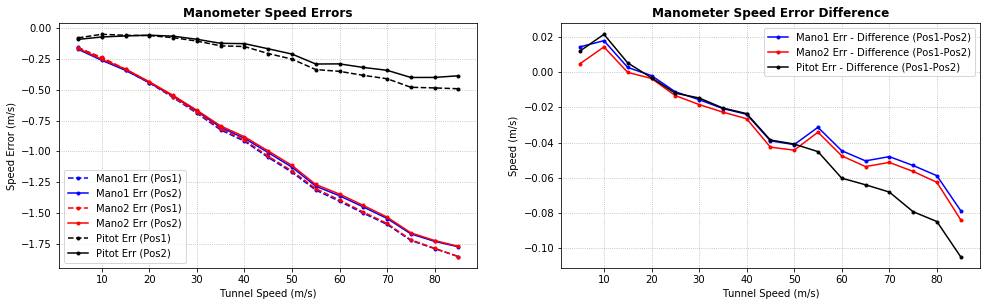

In [5]:
fig, ax = plt.subplots(1,2, figsize = (16.5, 4.5))

#***************************************************************************************************
# Left subplot
ax[0].set_title("Manometer Speed Errors", fontweight="bold")
ax[0].plot(SP, df_up_means ["Flow Mano 1"]  - SP, marker = ".", label="Mano1 Err (Pos1)", c="b", ls = "--")
ax[0].plot(SP, df_low_means["Flow Mano 1"]  - SP, marker = ".", label="Mano1 Err (Pos2)", c="b")
ax[0].plot(SP, df_up_means ["Flow Mano 2"]  - SP, marker = ".", label="Mano2 Err (Pos1)", c="r", ls = "--")
ax[0].plot(SP, df_low_means["Flow Mano 2"]  - SP, marker = ".", label="Mano2 Err (Pos2)", c="r")
ax[0].plot(SP, df_up_means ["Flow Mano 3 (ref)"]-SP, marker = ".", label="Pitot Err (Pos1)", c="k", ls = "--")
ax[0].plot(SP, df_low_means["Flow Mano 3 (ref)"]-SP, marker = ".", label="Pitot Err (Pos2)", c="k")
ax[0].set(ylabel = "Speed Error (m/s)", xlabel="Tunnel Speed (m/s)")
ax[0].grid(ls = ":")
ax[0].legend()

# Right subplot*********************************
ax[1].set_title("Manometer Speed Error Difference", fontweight="bold")
ax[1].plot(SP, df_up_means["Flow Mano 1"]  - df_low_means["Flow Mano 1"], c="b",  
        marker = ".", label="Mano1 Err - Difference (Pos1-Pos2)")
ax[1].plot(SP, df_up_means["Flow Mano 2"]  - df_low_means["Flow Mano 2"], c="r", 
        marker = ".", label="Mano2 Err - Difference (Pos1-Pos2)")
ax[1].plot(SP, df_up_means["Flow Mano 3 (ref)"] - df_low_means["Flow Mano 3 (ref)"], 
              marker = ".", label="Pitot Err - Difference (Pos1-Pos2)", c="k")
ax[1].set(ylabel="Speed (m/s)", xlabel="Tunnel Speed (m/s)")
ax[1].grid(ls = ":")
ax[1].legend()

fig.tight_layout;

### Result Graphs - MKS Pressure Transducers

<b>- Left plot:</b> Pressure measured by the 3 MKS pressure transducers of the system. Each MKS pressure transducer has 2 plots, a dotted one which corresponds to pressure when the pitot is located in position 1, and the continuous line one, corresponding to the pitot in position 2.<p>
<b>- Right plot:</b> Pressure difference when pitot is in position 1 versus when it is in position 2

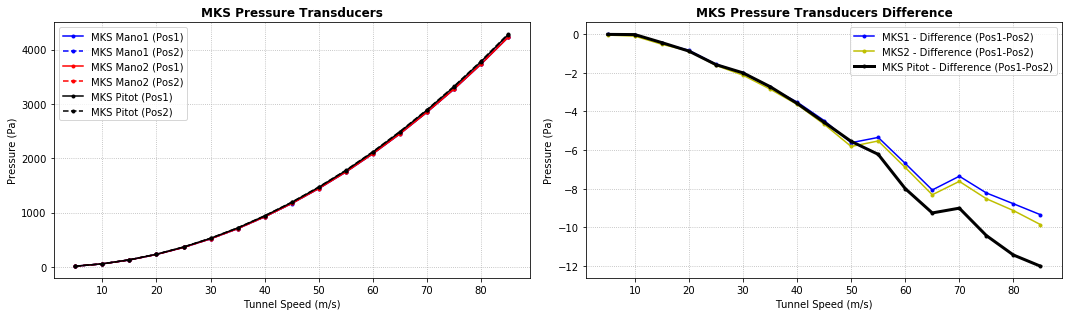

In [6]:
fig, ax = plt.subplots(1,2, figsize = (15, 4.5))

#***************************************************************************************************
# Left subplot
ax[0].set_title("MKS Pressure Transducers", fontweight="bold")
ax[0].plot(SP, df_up_means ["MKS Mano 1"],  marker = ".", label="MKS Mano1 (Pos1)", c = "b")
ax[0].plot(SP, df_low_means["MKS Mano 1"],  marker = ".", label="MKS Mano1 (Pos2)", c = "b", ls = "--")
ax[0].plot(SP, df_up_means ["MKS Mano 2"],  marker = ".", label="MKS Mano2 (Pos1)", c = "r")
ax[0].plot(SP, df_low_means["MKS Mano 2"],  marker = ".", label="MKS Mano2 (Pos2)", c = "r", ls = "--")
ax[0].plot(SP, df_up_means ["MKS Mano 3 (ref)"],  marker = ".", label="MKS Pitot (Pos1)", c = "k")
ax[0].plot(SP, df_low_means["MKS Mano 3 (ref)"],  marker = ".", label="MKS Pitot (Pos2)", c = "k", ls = "--")
ax[0].set(ylabel = "Pressure (Pa)", xlabel="Tunnel Speed (m/s)")
ax[0].grid(ls = ":")
ax[0].legend()

# Right subplot*********************************
ax[1].set_title("MKS Pressure Transducers Difference", fontweight="bold")
ax[1].plot(SP, df_up_means["MKS Mano 1"] - df_low_means["MKS Mano 1"], 
           marker = ".", label="MKS1 - Difference (Pos1-Pos2)", c="b")
ax[1].plot(SP, df_up_means["MKS Mano 2"] - df_low_means["MKS Mano 2"], 
           marker = ".", label="MKS2 - Difference (Pos1-Pos2)", c="y")
ax[1].plot(SP, df_up_means["MKS Mano 3 (ref)"] - df_low_means["MKS Mano 3 (ref)"], 
           marker = ".", label="MKS Pitot - Difference (Pos1-Pos2)", c="k", lw =3)
ax[1].set(ylabel="Pressure (Pa)", xlabel="Tunnel Speed (m/s)")
ax[1].grid(ls = ":")
ax[1].legend();

fig.tight_layout()

### Result Graphs - ASL Pressure Transducers

<b>- Left plot:</b> Pressure measured by the 3 ASL pressure transducers of the system. Each ASL pressure transducer has 2 plots, a dotted one which corresponds to pressure when the pitot is located in position 1, and the continuous line one, corresponding to the pitot in position 2.<p>
<b>- Right plot:</b> Pressure difference when pitot is in position 1 versus when it is in position 2

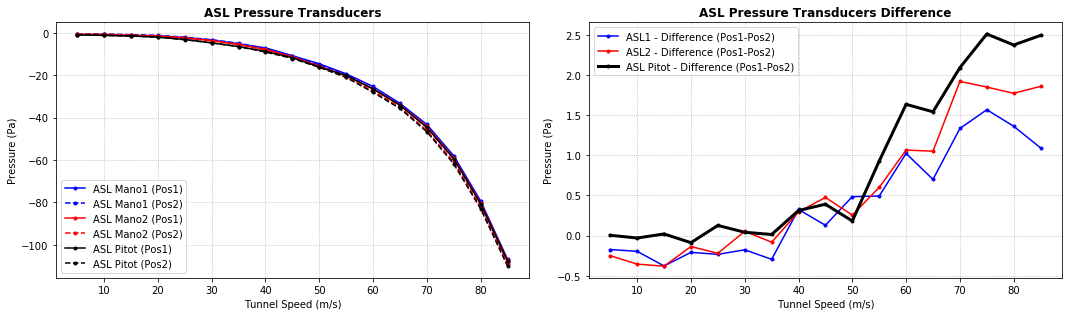

In [7]:
fig, ax = plt.subplots(1,2, figsize = (15, 4.5))

#***************************************************************************************************
# Left subplot
ax[0].set_title("ASL Pressure Transducers", fontweight="bold")
ax[0].plot(SP, df_up_means ["ASL Mano 1"],  marker = ".", label="ASL Mano1 (Pos1)", c = "b")
ax[0].plot(SP, df_low_means["ASL Mano 1"],  marker = ".", label="ASL Mano1 (Pos2)", c = "b", ls = "--")
ax[0].plot(SP, df_up_means ["ASL Mano 2"],  marker = ".", label="ASL Mano2 (Pos1)", c = "r")
ax[0].plot(SP, df_low_means["ASL Mano 2"],  marker = ".", label="ASL Mano2 (Pos2)", c = "r", ls = "--")
ax[0].plot(SP, df_up_means ["ASL Mano 3 (ref)"],  marker = ".", label="ASL Pitot (Pos1)", c = "k")
ax[0].plot(SP, df_low_means["ASL Mano 3 (ref)"],  marker = ".", label="ASL Pitot (Pos2)", c = "k", ls = "--")
ax[0].set(ylabel = "Pressure (Pa)", xlabel="Tunnel Speed (m/s)")
ax[0].grid(ls = ":")
ax[0].legend()

# Right subplot*********************************
ax[1].set_title("ASL Pressure Transducers Difference", fontweight="bold")
ax[1].plot(SP, df_up_means["ASL Mano 1"] - df_low_means["ASL Mano 1"], 
           marker = ".", label="ASL1 - Difference (Pos1-Pos2)", c="b")
ax[1].plot(SP, df_up_means["ASL Mano 2"] - df_low_means["ASL Mano 2"], 
           marker = ".", label="ASL2 - Difference (Pos1-Pos2)", c="r")
ax[1].plot(SP, df_up_means["ASL Mano 3 (ref)"] - df_low_means["ASL Mano 3 (ref)"], 
           marker = ".", label="ASL Pitot - Difference (Pos1-Pos2)", c="k", lw=3)
ax[1].set(ylabel="Pressure (Pa)", xlabel="Tunnel Speed (m/s)")
ax[1].grid(ls = ":")
ax[1].legend();

fig.tight_layout()

### Result Graphs - Fan Speed in RPM

- <b>Left plot:</b> Fan speed in RPM measured when the pitot is located in position 1 (dotted line) and when is located in position 2 (continuous line)<p>

- <b>Right plot:</b> Fan speed difference when pitot is in position 1 versus when it is in position 2

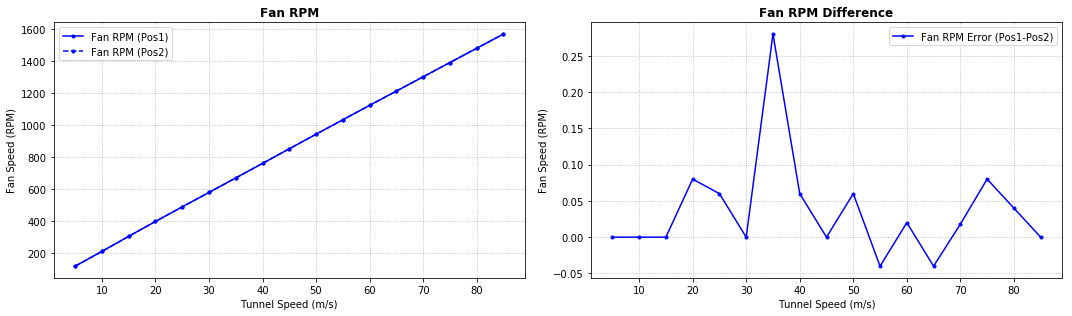

In [8]:
fig, ax = plt.subplots(1,2, figsize = (15, 4.5))

#***************************************************************************************************
# Left subplot
ax[0].set_title("Fan RPM", fontweight="bold")
ax[0].plot(SP, df_up_means["Speed (RPM)"],  marker = ".", label="Fan RPM (Pos1)", color="b")
ax[0].plot(SP, df_low_means["Speed (RPM)"], marker = ".", label="Fan RPM (Pos2)", color="b", ls="--")
ax[0].set(xlabel="Tunnel Speed (m/s)", ylabel="Fan Speed (RPM)" )
ax[0].grid(ls = ":")
ax[0].legend()

# Right subplot*********************************
ax[1].set_title("Fan RPM Difference", fontweight="bold")
ax[1].plot(SP, df_up_means["Speed (RPM)"] - df_low_means["Speed (RPM)"], c="b",
              marker = ".", label="Fan RPM Error (Pos1-Pos2)")
ax[1].set(ylabel="Fan Speed (RPM)", xlabel="Tunnel Speed (m/s)")
ax[1].grid(ls = ":")
ax[1].legend()
#****************************************************************************************************

fig.tight_layout()

In [9]:
print("\n\n")

Just for reference, below two tables are shown with the data of interest for this experiment:

### Data of interest for Pitot in position 1 (centered)

In [10]:
fields_of_interest = ["Tunnel Speed", "Flow Mano 1" , "Flow Mano 2", "Flow Mano 3 (ref)", "Speed (RPM)"]
new_field_names    = ["Avg Speed", "Speed Mano 1" , "Speed Mano 2", "Speed Mano 3 (Pitot)", "Fan Speed (RPM)"]

df_up_means[fields_of_interest].rename(columns = dict(zip(fields_of_interest,new_field_names)))

,Avg Speed,Speed Mano 1,Speed Mano 2,Speed Mano 3 (Pitot),Fan Speed (RPM)
Tunnel Setpoint,,,,,
5.0,4.840189,4.841642,4.838735,4.919339,119.000000
10.0,9.758409,9.755875,9.760925,9.948334,211.000000
15.0,14.662716,14.659295,14.666114,14.940365,305.000000
20.0,19.557710,19.554976,19.560926,19.938175,397.900000
25.0,24.438657,24.436747,24.440456,24.921196,488.980000
30.0,29.311897,29.308930,29.315240,29.893562,579.000000
35.0,34.179884,34.174270,34.183989,34.855077,669.360000
40.0,39.086394,39.082588,39.092417,39.849217,760.100000
45.0,43.956725,43.951329,43.961355,44.792498,851.000000


### Data of interest for Pitot in position 2 (lowered by 50mm)

In [11]:
df_low_means[fields_of_interest].rename(columns = dict(zip(fields_of_interest,new_field_names)))

,Avg Speed,Speed Mano 1,Speed Mano 2,Speed Mano 3 (Pitot),Fan Speed (RPM)
Tunnel Setpoint,,,,,
5.0,4.830272,4.827070,4.833729,4.907109,119.00
10.0,9.742106,9.737809,9.746426,9.926626,211.00
15.0,14.661387,14.656501,14.666125,14.934982,305.00
20.0,19.560657,19.556824,19.564414,19.941282,397.82
25.0,24.450641,24.447821,24.453692,24.933067,488.92
30.0,29.329215,29.324484,29.333582,29.908145,579.00
35.0,34.200820,34.194904,34.206658,34.875396,669.08
40.0,39.112576,39.106493,39.118858,39.872739,760.04
45.0,43.997914,43.990367,44.003999,44.831083,851.00


In [12]:
print("\n\n")

### <u>Conclusions</u>

It can be concluded that locating the pitot tube on either location in the test section does not make any appreciable difference. This is the preferred solution to avoid the robots to accidentally load a sensor while the pitot tube is fitted in the test section.

Just for reference, this is what the average of the two manometers look like when there is a sensor loaded in the test section. There is a plot for each mount type.

<img src=".\Speed Manos Sensor Loaded.jpg" width="800">

In [13]:
from IPython.display import HTML  # To add HTML code to the notebook

HTML('''<script> code_show=true; function code_toggle() {
        if (code_show) {
            $('div.input').hide();} 
        else {
            $('div.input').show();}
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script> The raw code for this Jupyter notebook is by default hidden for easier reading.
    To toggle visibility of code -> <a href="javascript:code_toggle()">here</a>.''')